# Practical for 'introduction to the NCAS CF Data Tools, cf-python and cf-plot'

<div class="alert alert-block alert-success">
<i>Practical instructions:</i> these green boxes provide instructions and tips about doing this practical (blue boxes are the same as in the teaching notebook and provide useful information). As guidance and for reference, the following are provided below before the practical material starts:
<ul>
    <li>the context and learning objectives from the main/presented Notebook below - you are advised to re-read this as a reminder;</li>
    <li>a copy of the final section from the main Notebook which provides links to further information - you might find the documentation links especially useful here;</li>
    <li>the note on terminology from section one is included also in the reminder as a guide to terms used throughout - read this if useful.</li>
</ul>
</div>
</div>

## A reminder: context, learning objectives and guidance links

### What are the NCAS CF Data Tools and why do they all have 'cf' in the name?

The _NCAS CF Data Tools_ are a suite of complementary Python libraries which are designed to facilitate working with data for research in the earth sciences and aligned domains. The two that are of most relevance to the average user, and those wanting to process, analyse and visualise atmospheric data, are *cf-python* (https://ncas-cms.github.io/cf-python/) and *cf-plot* (https://ncas-cms.github.io/cf-plot/build/). We will be focusing on use of cf-python and cf-plot today.

The 'cf' in the names of the NCAS CF Data Tools corresponds to the _CF Conventions_, a metadata standard, because they are built around this standard in the form of using the CF Data Model, which as well as performance is considered a 'unique selling point' of the tools.


### What are the CF Conventions?

The _CF Conventions_, usually referred to in this way but also know by the full name of the **C**limate and **F**orecast (CF) metadata conventions, are a metadata standard which is becoming the de-facto convention to cover the description of geoscientific data so that sharing and intercomparison is simpler. See https://cfconventions.org/ for more information.


### What are we going to learn in this session?

Our **learning aim** is to be able to use the NCAS CF Data Tools Python libraries, namely cf-python and cf-plot to process, analyse and visualise netCDF and PP datasets, whilst appreciating the context and 'unique selling point' of the libraries as being built to use the CF Conventions, a metadata standard for earth science data, to make it simpler to do what you want to do with the datasets, by working on top of a Data Model for CF.

We have **six distinct objectives**, matching the sections in this notebook and in the practical notebook you will work through. By the end of this lesson you should be familiar and have practiced using cf-python and cf-plot to:

1. read dataset(s) and view the (meta)data at different detail levels;
2. edit the (meta)data and write out the edited version to file;
3. reduce datasets by subspacing and collapsing;
4. visualise datasets as contour and vector plots;
5. analyse data: applying mathematical and statistical operations and plotting trends;
6. change the underlying grid of data through regridding.

### Guidance: where to find more information and resources on the NCAS CF Data Tools

Here are some links relating to the NCAS CF Data Tools and this training.

* This training, with further material, is hosted online and there are instructions for setting up the environment so you can work through it in your own time: https://github.com/NCAS-CMS/cf-tools-training.
* **The cf-python documentation lives at https://ncas-cms.github.io/cf-python/.**
* The cf-python code lives on GitHub at https://github.com/NCAS-CMS/cf-python. There is an Issue Tracker to report queries or questions at https://github.com/NCAS-CMS/cf-python/issues.
* **The cf-plot documentation lives at https://ncas-cms.github.io/cf-plot/build/.**
* The cf-plot code lives on GitHub at https://github.com/NCAS-CMS/cf-plot. There is an Issue Tracker to report queries or questions at https://github.com/NCAS-CMS/cf-plot/issues.
* There is a technical presentation about the NCAS CF Data Tools avaialble from https://hps.vi4io.org/_media/events/2020/summer-school-cfnetcdf.pdf.
* The website of the CF Conventions can be found at https://cfconventions.org/.
* The landing page for training into the CF Conventions is found here within the website above: https://cfconventions.org/Training/.

If you have any queries after this course, please either use the Issue Trackers linked above or you can email me at: sadie.bartholomew@ncas.ac.uk.

<div class="alert alert-block alert-info">
<i>Note:</i> In cf-python and when discussing related code and datasets, we use terminology from the CF Data Model (for more detail see: <a href="url">https://ncas-cms.github.io/cf-python/cf_data_model.html</a>). For example cf-python methods are named in relation to concepts from this data model. We don't have time to cover this in detail but for this session it is useful to know the following terms:

<ul>
    <li><b>field</b>: a self-contained cf-python object corresponding to a netCDF data variable with all of its (CF) metadata attached;</li>
    <li><b>field list</b>: a list of lields (see above), stored as its own cf-python object 'FieldList' which is similar to a Python list;</li>
    <li><b>coordinate</b>: a (CF) metadata concept which corresponds to netCDF coordinate variables. One or more coordinates are defined on every field as either 'dimension' or 'auxiliary' coordinate objects in cf-python.</li>
</ul>
</div>

***

<div class="alert alert-block alert-success">
<i>Practical instructions:</i> run all of the cells in this section to do the set up.
</div>

## Setting up

**In this section we set up this Notebook, import the libraries and check the data we will work with, ready to use the libraries within this notebook.**

Import cf-python and cf-plot:

In [4]:
import cfplot as cfp
import cf

Run some set up for nice outputs in this Jupyter Notebook (not required in interactive Python or a script):

In [5]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Inspect the versions of cf-python and cf-plot and the version of the CF Conventions those are matched to:

In [6]:
print("cf-python version is:", cf.__version__)
print("cf-plot version is:", cfp.__version__)
print("CF Conventions version is:", cf.CF())

cf-python version is: 3.16.2
cf-plot version is: 3.3.0
CF Conventions version is: 1.11


<div class="alert alert-block alert-info">
<i>Note:</i> you can work with data compliant by any other version of the CF Conventions, or without (much) compliance, but the CF Conventions version gives the maximum version that these versions of the tools understand the features of.
</div>

Finally, see what datasets we have to explore:

<div class="alert alert-block alert-info">
<i>Note:</i> in a Jupyter Notebook, '!' preceeeds a shell command, so this is a terminal command and not Python
</div>

In [ ]:
!ls ../data

***

<div class="alert alert-block alert-success">
<i>Practical instructions:</i> now we can start the practical. We will follow the same sectioning as in the teaching notebook, so please consult the notes there in the matching section for guidance and you can also consult the cf-python and cf-plot documentation linked above.
</div>

## 1. Reading dataset(s) and viewing the (meta)data at different detail levels

**In this section we look at a basic use of cf-python, reading in one or more datasets from file and inspecting the data and the metadata at different levels of detail to suit the amount of information you want to see.**

### a) Reading in data and extracting the _field_ of interest

**1.a.1)** Use `cf` to read in the netCDF dataset `qbo.nc` which is found (as shown at the end of the section above) under the directory `../data`, assigning it to a variable called 'fieldlist'.


In [7]:
fieldlist = cf.read("../data/qbo.nc")

**1.a.2)** Use the standard Python function `len` to see how long the read-in fieldlist is.

In [ ]:
len(fieldlist)

**1.a.3)** Access the first field in the fieldlist and assign it to the variable name 'field'.

In [8]:
field = fieldlist[0]

### b) Inspecting the _field_ of interest with different amounts of detail

**1.b.1)** View the field from (1.a.3) above in minimal detail.

In [ ]:
field

**1.b.2)** Now try viewing the field from (1.a.3) above at a medium detail level.

In [ ]:
print(field)

**1.b.3)** OK, finally let's see it in its full glory - with maximal detail. Take a minute or two to compare these outputs and familiarise yourself with the formats of the different views and how they present the metadata (and preview of the data) of a field.

In [ ]:
field.dump()

### c) Inspecting a metadata _construct_ e.g. _coordinate_ from the _field_ of interest

**1.c.1)** Let's assume we want to know about a specific metadata construct, in this case we are intereted in the pressure. Assign to a new variable called 'pressure' the pressure coordinate of the field stored in the variable 'field' from section (1a) as just inspected in section (1b).

In [ ]:
pressure = field.coordinate("pressure")

**1.c.2)** View this coordinate with minimal detail level.

In [ ]:
pressure

**1.c.3)** Now use the standard approach to view it with medium detail level.

In [ ]:
print(pressure)

**1.c.4)** Finally, let's use the approach for full detail level and see everything about this coordinate.

In [ ]:
pressure.dump()

### d) Inspecting a data array of interest

**1.d.1)** Access the underlying data of the pressure coordinate from the previous sub-section, (1c), assigning it to a variable called 'pressure_data'.

In [ ]:
pressure_data = pressure.data

**1.d.2)** Inspect the pressure coordinate data with minimal detail, noticing the units.

In [ ]:
pressure_data

**1.d.3)** Access the data array of the pressure coordinate. Note that, because it is small, it is not computationally expensive to access this and similarly with other metadata data arrays, but accessing the underlying data array of the whole field (i.e. its main stored variable) could be intensive because for datasets in real usage the data can be very large and/or multi-dimensional.

In [ ]:
pressure_array = pressure_data.array

**1.d.4)** Use the standard Python `print` function to view the pressure array.

In [ ]:
print(pressure_array)

***

## 2. Editing the (meta)data and writing out the edited version to file

**In this section we demonstrate how to change the data that has been read-in from file, both in terms of the data arrays and the metadata that describes it, and then how to write data back out to file with a chosen name, so that you can see how cf-python can be used to edit data or to make new data.**

### a) Changing the underlying data

**2.a.1)** Access the data (*not* the data array of the data) of the full field and assign it to a variable called 'data'.

In [9]:
data = field.data

**2.a.2)** Inspect the field data with medium detail use the `size` method on it to see its shape.

In [ ]:
print(data)
data.shape

**2.a.3)** Use the `size` method on it to see how many items (in this case, numbers) there are in it. Can you see how this relates to the `shape` above, and to the structure of the coordinates from the field inspection in (1.b.2)?

In [ ]:
data.size

**2.a.4)**

In [ ]:
first_time_subarray = data[0, :, :, :]
first_time_subarray

**2.a.5)** Change all of the values in the first time subarray to the value '-50.0'.

In [ ]:
first_time_subarray[0] = -50
first_time_subarray

**2.a.6)** Access the index item `[1, :, 0, 0]` of the full data array from (2.a.1) and assign it to a variable called 'a_subarray'. Then check what shape it is and try to understand the size that emerges for that sub-array given that specific index.

In [ ]:
a_subarray = data[1, 0, :, 0]
a_subarray.shape

**2.a.7)** Change the values for this sub-array item to all ones i.e. `1.0`. Note to create an array populated all with the value one of the required shape to match the shape of the subarray from (2.a.6), you can use `numpy.ones(<desired shape>)` (you will need to import `numpy` first, and let's call the module `np` i.e. use `import numpy as np`).

In [ ]:
import numpy as np
np.ones((1, 1, 2, 1))
data[1, 0, :, 0] = np.ones((1, 1, 2, 1))

**2.a.8)** Inspect 'a_subarray' again to confirm it has been set with values of all one.

In [ ]:
a_subarray

### b) Changing some metadata

**2.b.1)** Take the 'pressure' variable coordinate we created in (1.c) and inspected in full detail in (1.c.4). Let's say we want to reverse the direction of this axes, so that the pressures increase in value along it (in order) rather than decreases. In `cf` we can do this using the `flip` method, which will adjust the data accordingly so that it is flipped in the corresponding way to match up to the new direction of the pressure axis.

Reassign `pressure` to itself with the `flip` method applied (note you can, alternatively and equivalently, call the method `flip` with the argument `inplace=True` set without re-assignment because that argument tells `cf` to adjust the variable in-place).

In [ ]:
pressure = pressure.flip()
# Or: pressure.flip(inplace=True)

**2.b.2)** Now full inspect the pressure coordinate again with full detail to confirm that the flip of axis direction happened.

In [ ]:
pressure.dump()

**2.b.3)** Notice the `standard_name`, which is a CF attribute used to identify the physical quantity in question, that must be one from the thousands of controlled options available in the CF Standard Name table (see https://cfconventions.org/Data/cf-standard-names/current/build/cf-standard-name-table.html, you are encouraged to spend some minutes exploring this resource). At the moment the value in the field is not a valid standard name and it is also not specific enough to identify the variable well. 

Let's change it to the more descriptive valid CF Standard Name of 'air_pressure'. To do this, access the `standard_name` attribute of the pressure coordinate and re-set it to the string value desired.

In [ ]:
pressure.standard_name = "air_pressure"

**2.b.4)** Once again view the pressure coordinate with maximal detail to see the two changes we made in this section. Also view the overall field in medium detail to see that these changes propagate through to the field object by Python object rules.

In [ ]:
pressure.dump()

### c) Writing a (list of) fields out to a file

**2.c.1)** Let's write out a few fields to disk. We'll write our field from the previous sections as well as a new field all into the same file.

First let's get a new field. We could read in another file to access some new fields, but let's use one of the cf-python ready-made 'example fields', which are designed for exploring cf-python capability without the need for real (and large/memory-intensive) data. Run `cf.example_field()` with any integer from 0 to 11 inclusive to get an example field, assigning it to the variable called 'new_field'.

In [10]:
new_field = cf.example_field(1)  # Or: any integer from 0 to 11 works fine as the argument

**2.c.2)** Inspect this new field with medium level of detail.

In [6]:
print(new_field)

Field: air_temperature (ncvar%ta)
---------------------------------
Data            : air_temperature(atmosphere_hybrid_height_coordinate(1), grid_latitude(10), grid_longitude(9)) K
Cell methods    : grid_latitude(10): grid_longitude(9): mean where land (interval: 0.1 degrees) time(1): maximum
Field ancils    : air_temperature standard_error(grid_latitude(10), grid_longitude(9)) = [[0.76, ..., 0.32]] K
Dimension coords: atmosphere_hybrid_height_coordinate(1) = [20.0] m
                : grid_latitude(10) = [2.2, ..., -1.76] degrees
                : grid_longitude(9) = [-4.7, ..., -1.18] degrees
                : time(1) = [2019-01-01 00:00:00]
Auxiliary coords: latitude(grid_latitude(10), grid_longitude(9)) = [[53.941, ..., 50.225]] degrees_N
                : longitude(grid_longitude(9), grid_latitude(10)) = [[2.004, ..., 8.156]] degrees_E
                : long_name=Grid latitude name(grid_latitude(10)) = [--, ..., kappa]
Cell measures   : measure:area(grid_longitude(9), grid_latitu

**2.c.3)** Create a two-field FieldList called 'new_fieldlist' containing the field from (1.a.3) that we have been exploring in the previous sections (1.a) and (1.b) along with this new 'new_field' from (2.c.2). You can use the `cf` function `cf.FieldList` with the fields it should contain in a normal Python list as an arugment to set this up.

In [11]:
new_fieldlist = cf.FieldList([field, new_field])

**2.c.4)** Call `print` with this new fieldlist as an argument to view it in medium detail.

In [12]:
print(new_fieldlist)

[<CF Field: eastward_wind(time(398), pressure(37), latitude(2), longitude(48)) m s**-1>,
 <CF Field: air_temperature(atmosphere_hybrid_height_coordinate(1), grid_latitude(10), grid_longitude(9)) K>]


**2.c.4)** Now we have constructed our desired FieldList, we can write it out to file. Use `cf`'s `write` function to write it to a file called `two_fields.nc` in the `../data` directory.

In [13]:
cf.write(new_fieldlist, "../data/two_fields.nc")

**2.c.5)** Use the shell command `!ls ../data` to see the contents of that directory to confirm that the file was written there.

In [20]:
!ls ../data

IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc  precip_2010.nc
aaaaoa.pmh8dec.pp			   qbo.nc
alpine_precip_DJF_means.nc		   sea_currents.nc
cv-noxy_capeverde_20080301.nc		   sensor_data.nc
data1.nc				   tas.nc
ggas2014121200_00-18.nc			   tas_hadcm3_cf.nc
model_precip_DJF_means_low_res.nc	   tas_rcp45_2055_ann_avg_change.nc
n2o_emissions.nc			   tas_rcp45_2055_mon_avg_change.nc
precip_1D_monthly.nc			   two_fields.nc
precip_1D_yearly.nc			   xbhubo.pgc0apr.nc


***

## 3. Reducing datasets by subspacing and collapsing

**In this section we show how multi-dimensional data can be tamed using cf-python so that you can get a reduced form that can be analysed or plotted, by reducing the dimensions by selecting a subset of point(s) along the axes or collapsing down according to some statistic such as the mean or an extrema.**

### a) Subspacing using metadata conditions

**3.a.1)** Read in the file `ggas2014121200_00-18.nc` which is under `../data` and save the corresponding FieldList to a variable called `fieldlist_3`. Inspect it with medium level of detail.

In [12]:
fieldlist_3 = cf.read("../data/ggas2014121200_00-18.nc")
print(fieldlist_3)

[<CF Field: sea_ice_area_fraction(time(4), axis=Z(1), latitude(256), longitude(512)) 1>,
 <CF Field: air_pressure_at_sea_level(time(4), axis=Z(1), latitude(256), longitude(512)) Pa>,
 <CF Field: long_name=Skin temperature(time(4), axis=Z(1), latitude(256), longitude(512)) K>,
 <CF Field: long_name=Sea surface temperature(time(4), axis=Z(1), latitude(256), longitude(512)) K>,
 <CF Field: cloud_area_fraction(time(4), axis=Z(1), latitude(256), longitude(512)) 1>,
 <CF Field: eastward_wind(time(4), axis=Z(1), latitude(256), longitude(512)) m s**-1>,
 <CF Field: northward_wind(time(4), axis=Z(1), latitude(256), longitude(512)) m s**-1>]


**3.a.2)** Extract the field representing the `cloud_area_fraction` to a variable which we will call `cloud_field`. Inspect that also with medium level of detail.

In [13]:
cloud_field = fieldlist_3[4]
print(cloud_field)

Field: cloud_area_fraction (ncvar%TCC)
--------------------------------------
Data            : cloud_area_fraction(time(4), axis=Z(1), latitude(256), longitude(512)) 1
Dimension coords: time(4) = [2014-12-12 00:00:00, ..., 2014-12-12 18:00:00] standard
                : axis=Z(1) = [0.0] level
                : latitude(256) = [89.46282196044922, ..., -89.46282196044922] degrees_north
                : longitude(512) = [0.0, ..., 359.296875] degrees_east


**3.a.3)** Save the data of the `cloud_field` to a new variable we will call `cloud_field_data`. Do a `print` on the `shape` method of this to confirm the shape of the data, and compare this to the insepction report from the previous cell to see the same information represented in different ways.

In [14]:
cloud_field_data = cloud_field.data
print(cloud_field_data.shape)

(4, 1, 256, 512)


**3.a.4)** Make a subspace of the `cloud_field` from the cells above to subspace on the *first* time point in order. Note: doing date-time subspaces requires an extra step due to the nature of specifying dates and times which can be ambiguous otherwise: you need to wrap a quoted datetime string in the call `cf.dt()` to notify cf-python that you are providing a valid datetime string, e.g. `field1.subspace(time=cf.dt("2020-01-01 12:15:00"))`.

Assign the subspace operation resulting field to a variable `cloud_field_subspace1` and inspect it with medium detail.

*Extra task, for those who have studied section 4 before doing this practical**: make a contour plot of this subspace of the field to see what it looks like.*

Field: cloud_area_fraction (ncvar%TCC)
--------------------------------------
Data            : cloud_area_fraction(time(1), axis=Z(1), latitude(256), longitude(512)) 1
Dimension coords: time(1) = [2014-12-12 00:00:00] standard
                : axis=Z(1) = [0.0] level
                : latitude(256) = [89.46282196044922, ..., -89.46282196044922] degrees_north
                : longitude(512) = [0.0, ..., 359.296875] degrees_east
(1, 1, 256, 512)


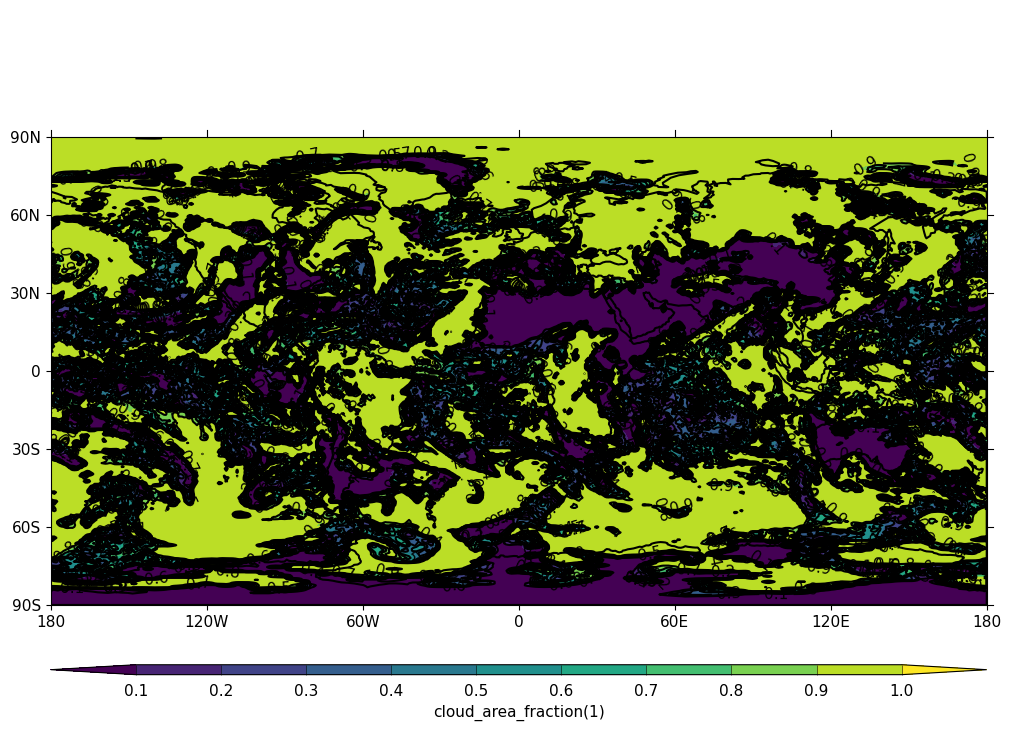

In [15]:
cloud_field_subspace1 = cloud_field.subspace(time=cf.dt("2014-12-12 00:00:00"))
print(cloud_field_subspace1)
print(cloud_field_subspace1.data.shape)
cfp.con(cloud_field_subspace1)

**3.a.5** Make a subspace of the `cloud_field` from the cells above to subspace on the *last* point on the latitude axis.

Assign the subspace operation resulting field to a variable `cloud_field_subspace2` and inspect it with medium detail.

*Extra task, for those who have studied section 4 before doing this practical: make a contour plot of this subspace of the field to see what it looks like.*

In [34]:
cloud_field_subspace2 = cloud_field.subspace(latitude=-89.46282196044922)
print(cloud_field_subspace2)
print(cloud_field_subspace2.data.shape)
# Extra part: cfp.con(cloud_field_subspace2)

Field: cloud_area_fraction (ncvar%TCC)
--------------------------------------
Data            : cloud_area_fraction(time(4), axis=Z(1), latitude(1), longitude(512)) 1
Dimension coords: time(4) = [2014-12-12 00:00:00, ..., 2014-12-12 18:00:00] standard
                : axis=Z(1) = [0.0] level
                : latitude(1) = [-89.46282196044922] degrees_north
                : longitude(512) = [0.0, ..., 359.296875] degrees_east
(4, 1, 1, 512)


### b) Subspacing using indexing, including equivalency to the above

**3.b.1)** Take the cloud field from (3.a.2) which we have been subspacing in the previous cells and make a subspace which takes the first time point, leaving all other axes unchanged, but this time do it using indexing. Use the `equals` method of a field to check that the result is the same as that derived from the 'subspacing by metadata' approach in section (3.a.4).

In [32]:
cloud_field_subspace1_by_index = cloud_field[0, :, :, :]
print(cloud_field_subspace1_by_index)
cloud_field_subspace1_by_index.equals(cloud_field_subspace1)
# or with the fields swapped i.e. cloud_field_subspace1.equals(cloud_field_subspace1_by_index) is also correct

Field: cloud_area_fraction (ncvar%TCC)
--------------------------------------
Data            : cloud_area_fraction(time(1), axis=Z(1), latitude(256), longitude(512)) 1
Dimension coords: time(1) = [2014-12-12 00:00:00] standard
                : axis=Z(1) = [0.0] level
                : latitude(256) = [89.46282196044922, ..., -89.46282196044922] degrees_north
                : longitude(512) = [0.0, ..., 359.296875] degrees_east


True

**3.b.2)** Now make a subspace on the original `cloud_field`, leaving all other axes unchanged, to subspace on the *last* point on the latitude axis, like before, but this time use subspacing by indexing. Use the `equals` method of a field to check that the result is the same as that derived from the 'subspacing by metadata' approach in section (3.a.4).

In [35]:
cloud_field_subspace2_by_index = cloud_field[:, :, -1, :]
print(cloud_field_subspace2_by_index)
cloud_field_subspace2_by_index.equals(cloud_field_subspace2)
# or with the fields swapped i.e. cloud_field_subspace2.equals(cloud_field_subspace2_by_index) is also correct

Field: cloud_area_fraction (ncvar%TCC)
--------------------------------------
Data            : cloud_area_fraction(time(4), axis=Z(1), latitude(1), longitude(512)) 1
Dimension coords: time(4) = [2014-12-12 00:00:00, ..., 2014-12-12 18:00:00] standard
                : axis=Z(1) = [0.0] level
                : latitude(1) = [-89.46282196044922] degrees_north
                : longitude(512) = [0.0, ..., 359.296875] degrees_east


True

**3.b.3)** Using indexing, do both of the subspaces from the previous sub-questions in one call on the original cloud field.

Extra: do the same operation using the 'subspace by metadata' approach and use the `equals` method to show that the results are the same.

In [36]:
cloud_field_subspace2_by_index = cloud_field[0, :, -1, :]
print(cloud_field_subspace2_by_index)
cloud_field_subspace2_by_index.equals(cloud_field_subspace2)

Field: cloud_area_fraction (ncvar%TCC)
--------------------------------------
Data            : cloud_area_fraction(time(1), axis=Z(1), latitude(1), longitude(512)) 1
Dimension coords: time(1) = [2014-12-12 00:00:00] standard
                : axis=Z(1) = [0.0] level
                : latitude(1) = [-89.46282196044922] degrees_north
                : longitude(512) = [0.0, ..., 359.296875] degrees_east


False

**3.b.4)** Do a single subspace on the original cloud field that takes the first 100 latitude and the first 200 longitude values. Use whichever method (subspacing by metadata, or indexing) you prefer, in order to do so.

In [37]:
cloud_field[:, :, :100, :200]

<CF Field: cloud_area_fraction(time(4), axis=Z(1), latitude(100), longitude(200)) 1>

### c) Statistical collapses

**3.c.1)** Take the original `cloud_field` from (3.a.2) and do a collapse over the time axis to reduce it down to the minimum value. Assign that to the variable name `cloud_field_collapse1`.

In [ ]:
cloud_field_collapse1 = cloud_field.collapse("time: minimum")
print(cloud_field_collapse1)

**3.c.2)** Take the original `cloud_field` from (3.a.2) and do a collapse over the latitude axis to reduce it down to the mean value. Assign that to the variable name `cloud_field_collapse2`.

In [ ]:
cloud_field_collapse2 = cloud_field.collapse("latitude: mean")
print(cloud_field_collapse2)

**3.c.3)** Take the original `cloud_field` from (3.a.2) and do a collapse over the longitude axis to reduce it down to the maximum value. Assign that to the variable name `cloud_field_collapse3`.

In [ ]:
cloud_field_collapse3 = cloud_field.collapse("longitude: maximum")
print(cloud_field_collapse3)

**3.c.4)** Finally, take the original `cloud_field` from (3.a.2) again and do a collapse over all horizontal space via the pair of horizontal spatial axes, latitude and longitude, to reduce them down to the standard deviation value. Assign that to the variable name `cloud_field_collapse4`.

In [ ]:
cloud_field_collapse4 = cloud_field.collapse("longitude: latitude: standard_deviation")
print(cloud_field_collapse4)

***

## 4. Visualising datasets as contour and vector plots

**In this section we demonstrate how to plot using cf-plot the data we have read and then processed and/or analysed using cf-python, notably showing how to create contour plots and vector plots as examples of some of the available plot types.**

### a) Making a contour plot

**4.a.1)** Read in the file `alpine_precip_DJF_means.nc` which is in the `../data` directory and assign the first field it contains to a variable called 'field_4'. Inspect that field with medium detail level.

In [16]:
field_4 = cf.read("../data/alpine_precip_DJF_means.nc")[0]
print(field_4)

Field: long_name=PRECIPITATION (ncvar%PRECIPITATION)
----------------------------------------------------
Data            : long_name=PRECIPITATION(projection_y_coordinate(138), projection_x_coordinate(243)) mm.d-1
Cell methods    : axis=T(1): mean
Dimension coords: projection_y_coordinate(138) = [2210000.0, ..., 2895000.0] meters
                : projection_x_coordinate(243) = [3675000.0, ..., 4885000.0] meters
                : axis=T(1) = [1996-07-15 12:00:00] standard
Auxiliary coords: longitude(projection_y_coordinate(138), projection_x_coordinate(243)) = [[2.1252150535583496, ..., 17.706647872924805]] degrees_east
                : latitude(projection_y_coordinate(138), projection_x_coordinate(243)) = [[42.69166564941406, ..., 48.90237045288086]] degrees_north
Coord references: grid_mapping_name:lambert_azimuthal_equal_area


**4.a.2)** Make a contour plot of the field, noting that because it is already 2D over X and Y axes corresponding to its projection so it can be plotted directly, without any need to reduce via subspacing or collapsing. Just get a plot working - there is no need to customise it yet.

In [ ]:
cfp.con(field_4)

### b) Customising the (contour) plot

**4.b.1)** Customise the contour plot made in section (4a) to remove the contour lines by running the same call with a new argument set appropriately.

In [ ]:
cfp.con(field_4, lines=False)

**4.b.2)** Customise the contour plot further so, as well as having the contour lines removed as applied above, it is shown using a different colour map to the default colour map, 'viridis'. You can use the link https://ncas-cms.github.io/cf-plot/build/colour_scales.html#colour-scales to explore the different options.

In [ ]:
cfp.cscale("precip4_11lev")  # or another choice of valid colour map string argument
cfp.con(field_4, lines=False)

**4.b.3)** Customise the contour plot further by adding the argument and value `resolution="10m"` to the call to `mapset`, which will increase the resolution of the country borders.

In [ ]:
cfp.mapset(resolution="10m")
cfp.con(field_4, lines=False)

**4.b.4)** Customise the contour plot further so that it focuses in on a smaller region over the Alps, specifically from longitude of 5 to 10 degrees east and from latitude of 45 to 47 degrees. Note, a call to `mapset` will reset any of the previous calls, so you will need to re-apply previous arguments to it that you want to preserve for future plots.

In [ ]:
cfp.mapset(lonmin=5, lonmax=10, latmin=45, latmax=47, resolution="10m")
cfp.con(field_4, lines=False)

### c) Making a vector plot with basic customisation

**4.c.1)** Read in the netCDF file `sea_currents.nc` stored in the usual directory, `../data`, assigning it to a variable 'irish_sea_fieldlist' and inspect it with medium detail.

In [ ]:
irish_sea_fieldlist = cf.read("../data/sea_currents.nc")
print(irish_sea_fieldlist)

**4.c.2)** Note that the first two fieds represent perpendicular components of the same directional variable for sea water velocity. The first field is the eastward and the second field is the northward, component of this.

In order to ensure they are compatible to plot together as vectors, we first need to ensure they are defined on the same gridpoints - in cf-python (from CF Data Model) terminology, we say they need to have the same *domain*. Assign to variable names 'eastward_component_field' and 'northward_component_field' the first and second fields respectively, and inspect them with minimal detail as a first step check to see if there is the same number of axes and points along each upon which the data is defined (there are two code blocks here, one for each field since when you inspect ith minimal detail it will only show if it is the final call in the cell).

In [ ]:
eastward_component_field = irish_sea_fieldlist[0]
eastward_component_field

In [ ]:
northward_component_field = irish_sea_fieldlist[1]
northward_component_field

**4.c.3)** You should be able to see from the metadata that the two fields are perpendicular components of the same wind field. But, for us to be sure these represent components of the same vector field, we need to check that they are defined at the same grid points - else the components are defined at different location points in space and therefore can't be combined into a single vector. In cf-python we call the locations that the data is representative of the *domain*.

We can check whether the two fields have the same domain by taking the `domain` attribute of each field and comparing those using the `equals` method, e.g. `field1.domain.equals(field2.domain)` for fields `field1` and `field2`. Do this for the two fields we defined in the pair of cells above.

In [ ]:
eastward_component_field.domain.equals(northward_component_field.domain)

**4.c.4)** We know now that the fields are the same variable, with perpendicular northward and eastward components, with the same domain i.e. defined on the same gridpoints. This means they are compatible vector components and can be plotted together to form a vector plot for the variable in question, the sea water velocity. However, we currently have the time coordinate with more than one point, so we need to reduce both fields down in the correpsonding way to get a particular 2D plot.

Let's take the final time point in the series of both of these fields to plot. Subspace both fields down in time to that final time axis point, using indexing - using section (3b) for a reminder about subspacing by index if you need guiance.

In [ ]:
eastward_component_field_last_time = eastward_component_field[-1, :, :, :]
print(eastward_component_field_last_time)

In [ ]:
northward_component_field_last_time = northward_component_field[-1, :, :, :]
print(northward_component_field_last_time)

**4.c.5)** Make a vector plot using the two subspaced component fields you found and defined in the previous section to form the corresponding vectors. Do not worry about customising it yet, just get a plot working even if the vectors are not optimised for readability, however do run `cfp.mapset(resolution="10m")` before you make the call to make the vector plot to reset the X and Y limits we specified in the previous section.

Note that the `u` keyword argument is for eastward vector components and the `v` keyword argument is for northward vector components.

In [ ]:
cfp.mapset(resolution="10m")
cfp.vect(u=eastward_component_field_last_time, v=northward_component_field_last_time)

**4.c.6)** Customise the plot you just made, in particular so that the vector lines are legible through adjusting the spacing and size at which they are plotted. This usually takes some trial and error - guess some values for the keyword argument values and increase or decrease them until you find a good balance so the vector lines can be distinguished and clearly interpreted.

In [ ]:
cfp.mapset(resolution="10m")
cfp.vect(u=eastward_component_field_last_time, v=northward_component_field_last_time, scale=3, stride=6)

***

## 5. Analysing data: applying mathematical and statistical operations and plotting trends

**In this section we demonstrate how to do some data analysis including performing arithmetic and statistical calculations on the data, showing how cf-python's CF Conventions metadata awareness means that the metadata is automatically updated to account for the operations that are performed.**

### a) Applying mathematics e.g. arithmetic and trigonometry on fields

**5.a.1)** Take the `fieldlist_3` we have already defined in (3.a.1). This time, we'll work with the *fourth* field in order in the list. Extract this field to a variable called `field_5` and inspect it with medium detail.

In [17]:
field_5 = fieldlist_3[3]
print(field_5)

Field: long_name=Sea surface temperature (ncvar%SSTK)
-----------------------------------------------------
Data            : long_name=Sea surface temperature(time(4), axis=Z(1), latitude(256), longitude(512)) K
Dimension coords: time(4) = [2014-12-12 00:00:00, ..., 2014-12-12 18:00:00] standard
                : axis=Z(1) = [0.0] level
                : latitude(256) = [89.46282196044922, ..., -89.46282196044922] degrees_north
                : longitude(512) = [0.0, ..., 359.296875] degrees_east


**5.a.2)** Take a subspace of the first time point, assigning it to a new variable called 'field_5_subspace', and plot it on a contour plot to see what the underlying data is like. Making a plot with cf-plot early on in this way is, for example, a good way to get a quick look at a new dataset to get a feel for the overall scope and patterns.

In [ ]:
field_5_subspace = field_5[0, :, :, :]
cfp.con(field_5_subspace)

**5.a.3)** To normalise data representing a variable `x`, there is the general formula `normalized_x = (x - minimum_x) / x-range`. Use the cf-python methods available on a field, namely `minimum()` and `range()`, to normalise the data in the subspace of `field_5` we defined as `field_5_subspace` from the previous step. Call this result `norm_field_5` as a new Python variable. Hint: you can apply these methods directly on the field which knows to apply them to its underlying data, and the whole data array will be operated on at once, as with array operations in NumPy and similar Python array libraries.

Finally, re-plot the contour plot at the subspace on the first time point to see that the data has been normalised appropriately: the colour bar range should go from 0 to 1 now but the data plot itself (contour pattern and colours) should not have changed because the normalisation adjusts all values to the 0 to 1 range but preserves the relative magnitudes between them.

In [ ]:
norm_field_5 = (field_5_subspace - field_5_subspace.minimum()) / field_5_subspace.range()
print(norm_field_5)
cfp.con(norm_field_5)

**5.a.4)** Finally, to explore basic field arithmetic and see the influence on the data via a plot, multiply `field_5_subspace` by negative one and plot this result as a contour plot. Describe in a sentence comment the difference in the plot to the original from .

In [ ]:
field_5_reversed = -1 * field_5_subspace
cfp.con(field_5_reversed)

### b) Line plotting

**5.b.1)** Let's make some line plots. To set this up, read in the file `IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc` under the usual directory `../data` and assign the *first* field in that FieldList to a variable called `monthly_field`. Inspect it with medium detail.

In [19]:
monthly_field = cf.read("../data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc")[0]
print(monthly_field)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m


**5.b.2)** Notice that the `monthly_field` is three-dimensional (3D) with axes sizes all over one for each of the three dimensions. In order to do a lineplot, we need a one-dimensional series, so we need to reduce the field down to size one in two of the dimensions to make a line plot.

Let's do a collapse to reduce the two spatial axes, latitude and longitude, at once. Do a collapse to the maximum over those two axes, assigning it to a variable we'll call `spatial_max_monthly_field`. You can specify both of those axes by name, or you can use `"area"` as a shorthand string which means both latitude and longitude at once.

In [18]:
spatial_max_monthly_field = monthly_field.collapse("area: maximum")

NameError: name 'monthly_field' is not defined

**5.b.3)** Use cf-plot to make a line plot of the collapsed field `spatial_max_monthly_field` from the cell above.

In [ ]:
cfp.lineplot(spatial_max_monthly_field)

### c) Calculating seasonal trends

**5.c.1)** Define a new variable `get_mam_season` and set it to the cf-python function `mam()` which represents a specific collapse over the months of March, April and May, just like `cf.djf()` represents a collapse over December, January and February etc. - there are four such methods to cover each trio of months closely aligned with the seasons, two of which were demonstrated in the teaching Notebook.

In [ ]:
get_mam_season = cf.mam()

**5.c.2)** Do a grouped collapse over the months of March, April and May only using the `group` argument set to `get_mam_season`, for a *maximum* collapse over the *time* axis on the `spatial_max_monthly_field`. Make a line plot of this collapsed field.

In [ ]:
mam_season_max = spatial_max_monthly_field.collapse("T: maximum", group=get_mam_season)
cfp.lineplot(mam_season_max)

**5.c.3)** Define three more variables representing specific collapse over the DJF, JJA and SON trio of months using the appropriate cf-python methods to complete the set across the calendar year (`cf.son()` is for the SON months and use the teaching Notebook for guidance on the other two methods if required but their names follow the same pattern so you can possibly guess them), assigning them to variables `get_djf_season`, `get_jja_season` and `get_son_season` respectively.

Then, using those three variables one-by-one, define three grouped collapses, also for a *maximum* collapse over the *time* axis as above, on the `spatial_max_monthly_field` field using these as the `group`, calling them `djf_season_max`, `jja_season_max` and `son_season_max` corresponding to the collapses in order above.

In [ ]:
get_djf_season = cf.djf()
get_jja_season = cf.jja()
get_son_season = cf.son()
djf_season_max = spatial_max_monthly_field.collapse("T: maximum", group=get_djf_season)
jja_season_max = spatial_max_monthly_field.collapse("T: maximum", group=get_jja_season)
son_season_max = spatial_max_monthly_field.collapse("T: maximum", group=get_son_season)

### d) Plotting the seasonal trends on one (line)plot

**5.d.1)** Let's make a line plot which shows all of the fields above: the four season maximum trends `djf_season_max`, `mam_season_max`, `jja_season_max` and `son_season_max`, along with the `spatial_max_monthly_field`. Use the code block from the teaching Notebook as a guide, or otherwise: you will need to wrap all of the calls to `lineplot` within `cfp.gopen()` and `cfp.gclose()` so they are plotted on the same canvas. You do not need to set positions.

In [ ]:
cfp.gopen()
cfp.lineplot(spatial_max_monthly_field)
cfp.lineplot(djf_season_max)
cfp.lineplot(mam_season_max)
cfp.lineplot(jja_season_max)
cfp.lineplot(son_season_max)
cfp.gclose()

**5.d.2)** Finally, copy your code from the previous cell and use the `label` argument to `lineplot` to assign labels to your individual line plot calls, which will result in a legend emerging on the final plot with the labels to identify each line.

In [ ]:
cfp.gopen()
cfp.lineplot(spatial_max_monthly_field, label="Original monthly data (spatial mean)")
cfp.lineplot(djf_season_max, label="Maximum over the DJF months of the original spatial maximum")
cfp.lineplot(mam_season_max, label="Maximum over the MAM months of the original spatial maximum")
cfp.lineplot(jja_season_max, label="Maximum over the JJA months of the original spatial maximum")
cfp.lineplot(son_season_max, label="Maximum over the SON months of the original spatial maximum")
cfp.gclose()

***

## 6. Changing the underlying grid of data through regridding

**In this section we demonstrate how to change the underlying grid of the data to another grid which could be a higher- or lower- resolution one, or a completely different grid, which is called regridding or interpolation, and indicate various options cf-python supports for doing this.**

### a) Getting a _source_ field ready to regrid

**6.a.1)** Define a new variable 'yearly_field' set to the first field in the FieldList read-in from the netCDF dataset `precip_1D_yearly.nc` which lives in the usual directory, `../data`. Inspect it with medium level of detail.

In [20]:
yearly_field = cf.read("../data/precip_1D_yearly.nc")[0]
print(yearly_field)

Field: long_name=precipitation (ncvar%pre)
------------------------------------------
Data            : long_name=precipitation(long_name=time(10), long_name=latitude(1), long_name=longitude(1)) mm
Cell methods    : long_name=time(10): mean long_name=latitude(1): long_name=longitude(1): mean
Dimension coords: long_name=time(10) = [1981-07-02 00:00:00, ..., 1990-07-02 00:00:00] gregorian
                : long_name=latitude(1) = [0.0] degrees_north
                : long_name=longitude(1) = [0.0] degrees_east


**6.a.2)** This will be our source field for regridding. Note it is a time series, not a dataset defined across different points in space! We can regrid data on any axis or axes, they do not have to represent spatial coordinates, including 1D series. In this case, we have an effectively 1D (3D but with two of the axes size one, hence of size which can be ignored) time series and we are going to regrid it. For a time series, visually this

Make a line plot of the time series in `yearly_field` to see it. Add the argument `marker="o"` to the call which plots markers against the individual data points forming the line. With the markers on we can see the discrete sample points that make up the data represented by the continuous line.

In [ ]:
cfp.lineplot(yearly_field, marker="o")

### b) Getting the _destination_ field: another field in order to regrid the previous _onto its grid_

**6.b.1)** Let's get another time series field, but one with a different sampling resolution. The sampling of time points across the axes is the *grid* in this context. For our destination field, we will take a series which is sampled at higher resolution.

Define a new variable 'monthly_field' set to the first field in the FieldList read-in from the netCDF dataset `precip_1D_monthly.nc` which lives in the usual directory, `../data`. Inspect it with medium level of detail.

In [21]:
# Read in another precipitation field, with more time axis points, and inspect it
monthly_field = cf.read("../data/precip_1D_monthly.nc")[0]
print(monthly_field)

Field: long_name=precipitation (ncvar%pre)
------------------------------------------
Data            : long_name=precipitation(long_name=time(120), long_name=latitude(1), long_name=longitude(1)) mm
Cell methods    : long_name=latitude(1): long_name=longitude(1): mean
Dimension coords: long_name=time(120) = [1981-01-16 00:00:00, ..., 1990-12-16 00:00:00] gregorian
                : long_name=latitude(1) = [0.0] degrees_north
                : long_name=longitude(1) = [0.0] degrees_east


**6.b.2)** As the name of the corresponding read-in files suggests, this `dest_field` represents monthly data and the `source_field` represents yearly data, so `dest_field` is around 12 times the resolution of the `source_field`.

Make a line plot of the `dest_field` showing the markers for the discrete data points. Compare this line plot to the one above with respect to the time axis (on the x-axis) to confirm the difference in sampling frequencies of around x12. Note we don't care about the values of the data at each point and whether it is different to the data of the source grid we are considering! All we want to extract from this destination field time series is the time point sampling, our destination grid. (Likewise, in the teaching Notebook where we did horizontal spatial grid regridding, the data defined on the destination grid `lower_res_field` did not matter, just the grid points it was defined on.)

In [ ]:
cfp.lineplot(monthly_field, marker="o")

### c) Performing the regrid operation from the source to the destination fields

**6.c.1)** Before we do the regridding operation, let's demonstrate briefly how to remove any size one axes from a field. Note this is not necessary in order to do the regridding, but it can 'tidy up' the fields so they don't have size one axes attached, which can be useful in cases like this because it means the axes are both 1D so it is simpler to interpret the regridding we are doing. To remove the size one axes of a field, apply the `squeeze()` method: you can either re-assign the field with `squeeze()` applied to the same variable name, or use the `inplace=True` argument to the method which changes the field in-place i.e. to the variable storing it without the need to re-assign.

Apply the `squeeze` method to the `monthly_field` and the `yearly_field` and inspect the results of each with medium level of detail.

In [22]:
monthly_field = monthly_field.squeeze()  # or just monthly_field.squeeze(inplace=True)
print(monthly_field)
yearly_field = yearly_field.squeeze()  # or just yearly_field.squeeze(inplace=True)
print(yearly_field)

Field: long_name=precipitation (ncvar%pre)
------------------------------------------
Data            : long_name=precipitation(long_name=time(120)) mm
Cell methods    : long_name=latitude(1): long_name=longitude(1): mean
Dimension coords: long_name=time(120) = [1981-01-16 00:00:00, ..., 1990-12-16 00:00:00] gregorian
                : long_name=latitude(1) = [0.0] degrees_north
                : long_name=longitude(1) = [0.0] degrees_east
Field: long_name=precipitation (ncvar%pre)
------------------------------------------
Data            : long_name=precipitation(long_name=time(10)) mm
Cell methods    : long_name=time(10): mean long_name=latitude(1): long_name=longitude(1): mean
Dimension coords: long_name=time(10) = [1981-07-02 00:00:00, ..., 1990-07-02 00:00:00] gregorian
                : long_name=latitude(1) = [0.0] degrees_north
                : long_name=longitude(1) = [0.0] degrees_east


**6.c.2)** Now to do the actual regridding operation! (You could call all the field methods such as reading, indexing and squeezing in the same line as the actual regrid operation, but doing so would be harder to interpret and to debug in case something wasn't speciied correctly, or some other issue, so we have worked these out step-by-step as better practice.)

In the teaching Notebook we used the `regrids` method which performs *spherical* regridding (`s` for spherical) because longitude and latitude are defined on the Earth's surface which forms a spherical coordinate system (you can read more about spherical regridding if desired here: https://ncas-cms.github.io/cf-python/tutorial.html#spherical-regridding).

But that is not appropriate here because we aren't considering coordinates defined on a spherical surface, so we need to use *Cartesian* regridding. We use the `regridc` method of cf-python to do this, where the `c` in the name stands for the 'C' of Cartesian, which is the appropriate type here and in general you should use when considering any axes in Euclidean (ie. flat/non-curved) space (you can read more about Cartesian regridding if desired here: https://ncas-cms.github.io/cf-python/tutorial.html#cartesian-regridding).

With that in mind, take the source and destinations fields we set up in the previous sub-sections and apply the cf-python Cartesian regridding operation to regrid `yearly_field` to the grid (i.e. the sampling resolution in this 1D case) of `monthly_field`, assigning the output to a new variable `linear_regridded_field`. Use the `"linear"` argument to `method` to use linear interpolation as the regridding method, this time. You will need to set a further argument for Cartesian regridding, namely `axes="T"` to indicate that we want to regrid over the 'time'/'T' axis.

In [23]:
linear_regridded_field = yearly_field.regridc(monthly_field, method="linear", axes="T")
print(linear_regridded_field)

Field: long_name=precipitation (ncvar%pre)
------------------------------------------
Data            : long_name=precipitation(long_name=time(120)) mm
Cell methods    : long_name=time(120): mean long_name=latitude(1): long_name=longitude(1): mean
Dimension coords: long_name=time(120) = [1981-01-16 00:00:00, ..., 1990-12-16 00:00:00] gregorian
                : long_name=latitude(1) = [0.0] degrees_north
                : long_name=longitude(1) = [0.0] degrees_east


**6.c.3)** Make a line plot of `linear_regridded_field`, including the argument `marker="o"` so that we can see the discrete points the line is based upon.

In [ ]:
cfp.lineplot(linear_regridded_field, marker="o")

**6.c.4)** This time, regrid the inverse way to before, so that our `yearly_field` this time is our destination field and our `monthly_field` is our source field. Again, use `regridc` with the `"linear"` argument to `method` to use linear interpolation as the regridding method, and set `axes="T"` to indicate that we want to regrid over the 'time'/'T' axis.

Call this `inverse_linear_regridded_field`. Inspect it with medium detail level and make a line plot of it showing markers.

In [27]:
inverse_linear_regridded_field = monthly_field.regridc(yearly_field, method="linear", axes="T")
print(inverse_linear_regridded_field)
cfp.lineplot(inverse_linear_regridded_field, marker="o")

Field: long_name=precipitation (ncvar%pre)
------------------------------------------
Data            : long_name=precipitation(long_name=time(10)) mm
Cell methods    : long_name=latitude(1): long_name=longitude(1): mean
Dimension coords: long_name=time(10) = [1981-07-02 00:00:00, ..., 1990-07-02 00:00:00] gregorian
                : long_name=latitude(1) = [0.0] degrees_north
                : long_name=longitude(1) = [0.0] degrees_east


**6.c.5)** Regrid the reverse way to before, like in (6.c.4), but this time use the `"nearest_stod"` method of `regridc` which stands for 'nearest neighbour source to destination' interpolation. This will do the same regridding but using a different approach to the underlying calculation based upon mapping each destination point to the closest source point.

Call this `inverse_nearest_stod_regridded_field`. Inspect it with medium detail level and make a line plot of it showing markers.

In [26]:
inverse_nearest_stod_regridded_field = monthly_field.regridc(yearly_field, method="nearest_stod", axes="T")
print(inverse_nearest_stod_regridded_field)
cfp.lineplot(inverse_nearest_stod_regridded_field, marker="o")

Field: long_name=precipitation (ncvar%pre)
------------------------------------------
Data            : long_name=precipitation(long_name=time(10)) mm
Cell methods    : long_name=latitude(1): long_name=longitude(1): mean
Dimension coords: long_name=time(10) = [1981-07-02 00:00:00, ..., 1990-07-02 00:00:00] gregorian
                : long_name=latitude(1) = [0.0] degrees_north
                : long_name=longitude(1) = [0.0] degrees_east


### d) Finally, some more advanced cf-plot plotting to compare the source, destination, and regridded results

**6.d.1)** Use cf-plot to make a plot with *two separate line plots* on one canvas (in either separate rows or columns, your choice), one of the first original field `yearly_field` and the linearly-regridded version of it, `linear_regridded_field`, so we can compare the original (un-regridded) and regridded result.

Use the code block from the teaching Notebook section (6b) as a guide, or otherwise: you will need to wrap all of the calls to `lineplot` within `cfp.gopen()` and `cfp.gclose()` so they are plotted on the same canvas and call `cfp.gpos(N)` with an integer starting at `N=1` to tell cf-plot to move on to the next position in the plot before making a `lineplot` call.

In [ ]:
cfp.gopen(rows=1, columns=2)  # or could use rows=2, columns=1 for one column instead
cfp.gpos(1)
cfp.lineplot(
    yearly_field, marker="o", color="red", title="Original time series... before regridding")
cfp.gpos(2)
cfp.lineplot(linear_regridded_field, marker="o", color="blue", title="... and after regridding")
cfp.gclose()

**6.d.2)** This time, use cf-plot to make a plot with *multiple line plots plotted together on the same (x- and y-) axes*. Plot both original fields along with the two regridded `inverse_*_regridded_field`, this time, and plot them in different colours of your choosing with sensible descriptive labels:
1. `monthly_field`
2. `yearly_field`
3. `inverse_linear_regridded_field`
4. `inverse_nearest_stod_regridded_field`

Use the code block from the teaching Notebook section (5d) as a guide, or otherwise: you will need to wrap all of the calls to `lineplot` within `cfp.gopen()` and `cfp.gclose()` and by, not calling `cfp.gpos()` with position integers in the last question, all of the lines will be plotted onto the same canvas to share axes

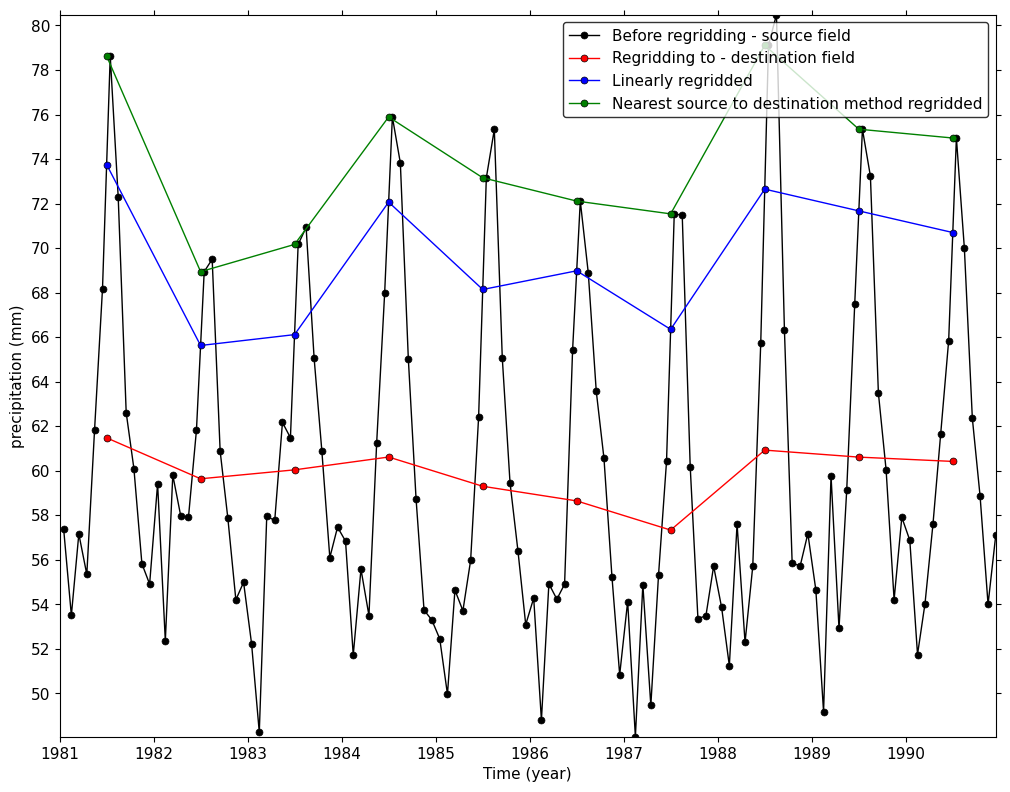

In [28]:
cfp.gopen()
cfp.lineplot(monthly_field, marker="o", color="black", label="Before regridding - source field")
cfp.lineplot(yearly_field, marker="o", color="red", label="Regridding to - destination field")
cfp.lineplot(inverse_linear_regridded_field, marker="o", color="blue", label="Linearly regridded")
cfp.lineplot(
    inverse_nearest_stod_regridded_field, marker="o", color="green", label="Nearest source to destination method regridded")
cfp.gclose()

**6.d.3)** Finally, study the two compound plots created in this section, in particular paying attention to the marker spacings representing the time data point sampling i.e. resolution which forms our grid in this context, to help you to ensure you understand the process of regridding.

Also, look back to the horizontal spatial regridding example plot in (6d) of the teaching Notebook and pay particular attention to the cell block sizes from before and after regridding, to remind yourself the output from a spatial regridding operation.

We've practiced regridding of fields in two contexts: spherical regridding in a 2D spatial context and Cartesian regridding in a 1D time series context. Hopefully these two examples have allowed you to understand what regridding does, but at least how cf-python can enable you to do it.

***